# Separating the XOR problem using a multi-layer perceptron

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from lib.mlp import MLP

In [5]:
# Data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T

# Labels
y = np.array([[0, 1, 1, 0]])

In [6]:
# Plot data in foreground, predictions in background
def plot_predictions(x, y, model, zoom_out_ratio=1.1):

    # Find data bounds
    x1_min, x2_min = x.min(axis=1)
    x1_max, x2_max = x.max(axis=1)

    x1_range = x1_max - x1_min
    x2_range = x2_max - x2_min

    # Enlarge data bounds for prettier plotting
    x1_min -= (zoom_out_ratio - 1) * x1_range
    x1_max += (zoom_out_ratio - 1) * x1_range
    x2_min -= (zoom_out_ratio - 1) * x2_range
    x2_max += (zoom_out_ratio - 1) * x2_range

    # Generate background
    size = 100
    x1_vals = np.linspace(x1_min, x1_max, num=size)
    x2_vals = np.linspace(x2_min, x2_max, num=size)
    background = np.ones(shape=(size, size))
    for i, x1_val in enumerate(x1_vals):
        for j, x2_val in enumerate(x2_vals):
            background[i, j] = model.predict(np.array([[x1_val, x2_val]]).T)

    # Plot background
    fig, ax = plt.subplots()
    ax.imshow(background, extent=[x1_min, x1_max, x2_min, x2_max], cmap='coolwarm_r')

    # Plot data
    ax.plot(*x[:, y[0] == 0], 'wo', markersize=9)
    ax.plot(*x[:, y[0] == 0], 'bo', markersize=6)
    ax.plot(*x[:, y[0] == 1], 'wo', markersize=9)
    ax.plot(*x[:, y[0] == 1], 'ro', markersize=6)

## Single layer perceptron

It won't converge. Problem is not linerarly separable.

epoch 1, error = 0.187


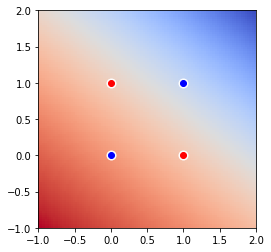

epoch 100, error = 0.128


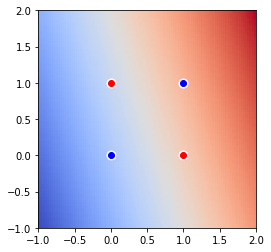

epoch 200, error = 0.126


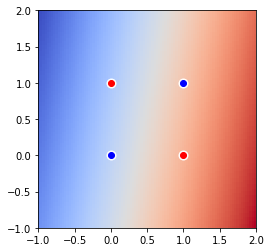

In [7]:
slp = MLP(layers=[2, 1])

cum_epochs = 0

for epochs in [1, 99, 100]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()

## Multi-layer perceptron, 1 hidden layer

epoch 1, error = 0.135


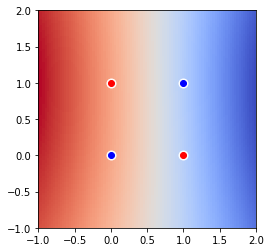

epoch 50, error = 0.067


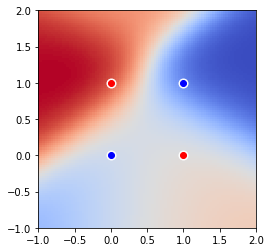

epoch 100, error = 0.009


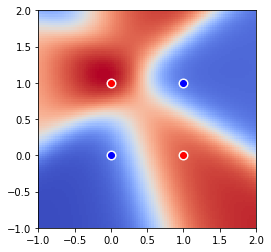

In [8]:
slp = MLP(layers=[2, 10, 1])

cum_epochs = 0

for epochs in [1, 49, 50]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()

## Multi-layer perceptron, 2 hidden layers

epoch 1, error = 0.149


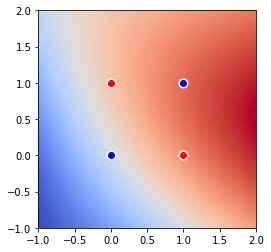

epoch 1000, error = 0.000


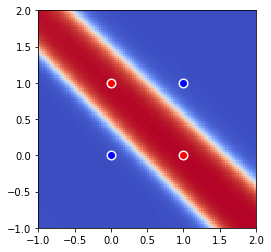

In [13]:
slp = MLP(layers=[2, 5, 5, 1])

cum_epochs = 0

for epochs in [1, 999]:
    
    error = slp.fit(x, y, epochs, eta=3)
    cum_epochs += epochs
    
    print('epoch %i, error = %.3f' % (cum_epochs, error))
    plot_predictions(x, y, slp, zoom_out_ratio=2)
    plt.show()